In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# Fonctions

In [51]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

In [52]:
def forward_propagation(X, parametres):
  
  activations = {'A0': X}

  C = len(parametres) // 2

  for c in range(1, C + 1):

    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

  return activations

In [53]:
def back_propagation(y, parametres, activations):

  m = y.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

In [54]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [55]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [56]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
        y_pred = predict(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    return training_history

# Dataset

dimensions de X: (2, 100)
dimensions de y: (1, 100)


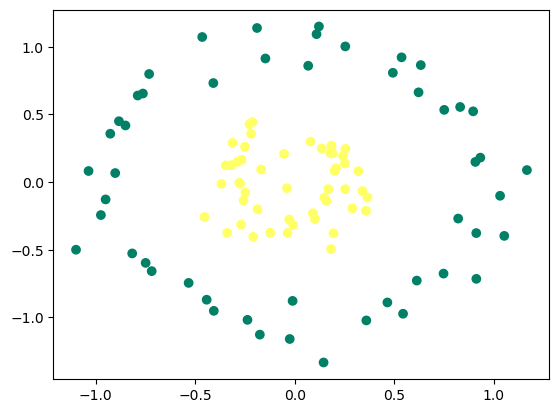

In [57]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 3000/3000 [00:06<00:00, 442.33it/s]


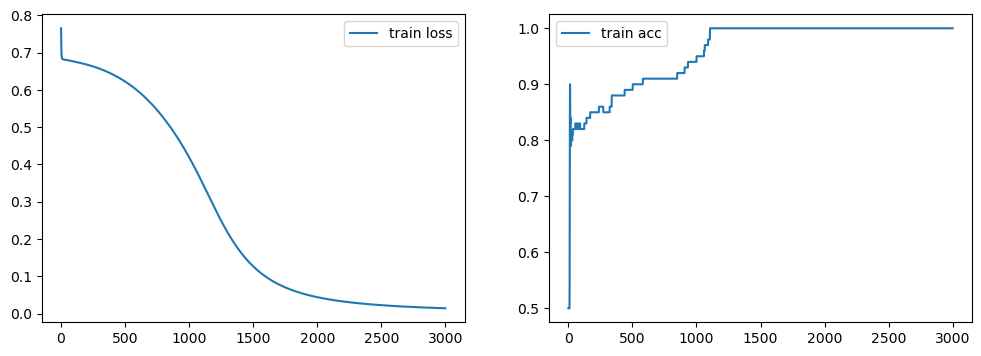

array([[0.76537816, 0.5       ],
       [0.73318091, 0.5       ],
       [0.71304419, 0.5       ],
       ...,
       [0.01403589, 1.        ],
       [0.01402475, 1.        ],
       [0.01401363, 1.        ]])

In [58]:
deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000)

100%|██████████| 3000/3000 [00:09<00:00, 331.83it/s]


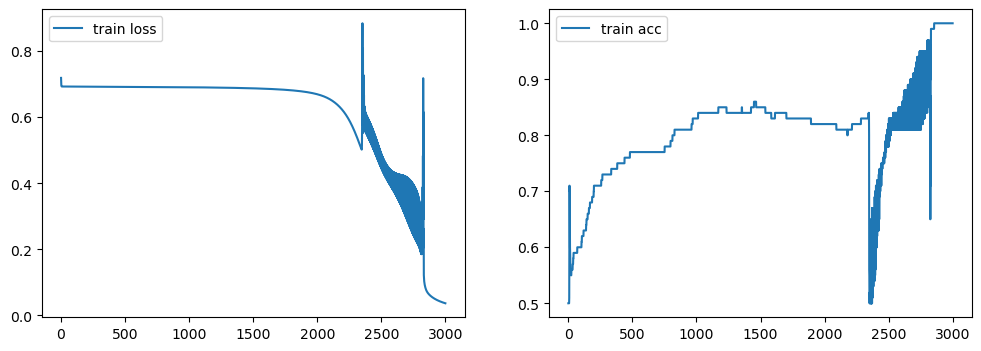

array([[0.71921223, 0.5       ],
       [0.7030367 , 0.5       ],
       [0.69683617, 0.5       ],
       ...,
       [0.0367666 , 1.        ],
       [0.03664777, 1.        ],
       [0.03652972, 1.        ]])

In [59]:
deep_neural_network(X, y, hidden_layers = (16, 16, 16,16, 16, 16,16, 16, 16), learning_rate = 0.1, n_iter = 3000)

100%|██████████| 200/200 [00:00<00:00, 203.95it/s]


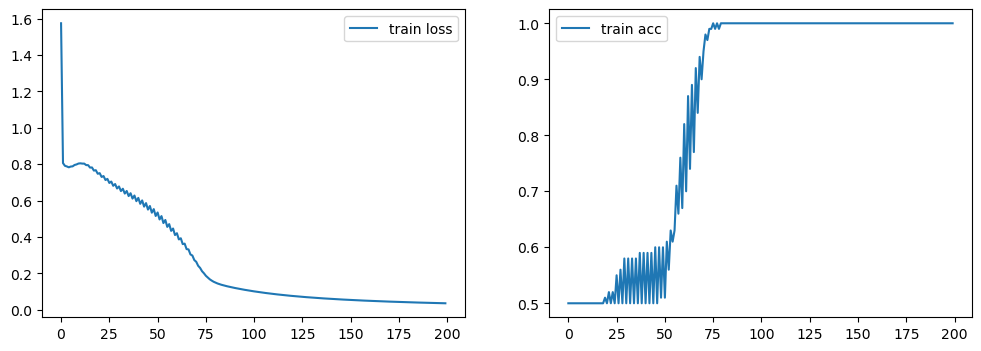

array([[1.57393044, 0.5       ],
       [0.80595106, 0.5       ],
       [0.79109306, 0.5       ],
       [0.78763929, 0.5       ],
       [0.78281952, 0.5       ],
       [0.78694986, 0.5       ],
       [0.78821353, 0.5       ],
       [0.79573666, 0.5       ],
       [0.79857352, 0.5       ],
       [0.80348947, 0.5       ],
       [0.8047491 , 0.5       ],
       [0.80325601, 0.5       ],
       [0.80312264, 0.5       ],
       [0.79492611, 0.5       ],
       [0.79482263, 0.5       ],
       [0.7812818 , 0.5       ],
       [0.78211758, 0.5       ],
       [0.76486802, 0.5       ],
       [0.76698389, 0.5       ],
       [0.74739605, 0.51      ],
       [0.75089881, 0.5       ],
       [0.72990051, 0.52      ],
       [0.73484498, 0.5       ],
       [0.71293837, 0.52      ],
       [0.71937557, 0.5       ],
       [0.69674444, 0.55      ],
       [0.70471963, 0.5       ],
       [0.68134699, 0.56      ],
       [0.69088914, 0.5       ],
       [0.66664945, 0.58      ],
       [0.

In [60]:
deep_neural_network(X, y, hidden_layers = (120,32,32,32,120), learning_rate = 0.1, n_iter = 200)